# Kunskapskontroll 3

När man arbetar md AI appliceringar är datan i många sammanhang en central del. Därför behöver man förstå och utforska datan. Det brukkar kallas för "Exploratory Data Analysis" (EDA).

I denna kunskapskontrollen har du ett dataset som heter "housing". Gör en utforskande analys där du t.ex. kan utföra visualiseringar, beräkningar samt bearbeta datan för att se om det exempelvis finns saknade värden i den. Målet är att man ska kunna läsa skriptet och följa din analys av datan. Exempelvis: Vilka hus är dyrare/billigare? Varför? housing.csv

Du lämnar in kunskapskontrollen i en Jupyter Notebook via samma GitHub mapp som kunskapskontroll 2. Lämna in skriptet med exekverad kod så jag kan se resultaten utan att köra all kod manuellt.

## Workflow divided into 5 areas

I will divide the workflow for the Exploratory Data Analysis (EDA) into five areas;
1) Data import - import of the data and information about the dataset
2) Data transformation - removing duplices, missing data, outliers and adding new data
3) Data analytics & visualization - analyze dataset visually 
4) Statistical analytics - analyze dataset statistically using a correlation matrix
5) Summary and conclusions

## 1) Data import

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # used for color coded legends in the longitude/latitude validation heatmap
housing = pd.read_csv("housing.csv")

In [31]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [9]:
housing.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Comments: 
- Extreme values (both std and max) for total_rooms, total_bedrooms, population and households which could indicate outliers.
- Median_income, median_house_value and housing_median_age also have a large max value which could indicate a cap. 

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Comments: 
- Dataset contain 20640 rows and 10 columns of data focused on housing data (median_house_value, ocean_proximity, longitude, latitude, total_rooms, total_bedrooms) and population data (households, median_income, population, housing_median_age). Each row representing an area on the map (latitude and longitude). 

Columns: 
- longitude: geographical longitude
- latitude: geographical latitude
- housing_median_age: age of housing in the region
- total_rooms: total number of rooms in the region
- total_bedrooms: total number of bedrooms
- popuation: total population in the region
- households: total households in the region
- median_income: median income of residents
- median_house_value: median house value
- ocean_proximity: categorical variable indicating proximity to the ocean

## 2) Data transformation

### 2.1) Added data
The columns total_rooms, total_bedrooms and household reflect the total value which can be hard to analyze so I decided to add the mean value for each column and store this in seperate columns. 

In [15]:
# add additional columns with calculated data
housing["ave_rooms"] = housing["total_rooms"]/housing["households"]
housing["ave_bedrooms"] = housing["total_bedrooms"]/housing["households"]
housing["ave_household"] = housing["population"]/housing["households"]
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ave_rooms,ave_bedrooms,ave_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.476104,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006029,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.048889,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.099631,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


Comments: ave_rooms, ave_bedrooms and ave_household added to the dataset as new columns

### 2.2) Duplicates

In [17]:
# check for duplicates
housing.duplicated().sum()

0

Comments: no duplicates so no need to adjust dataset for this. 

### 2.3) Missing data

In [19]:
# check for missing data
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
ave_rooms               0
ave_bedrooms          207
ave_household           0
dtype: int64

Comments: 207 rows with missing data for total_bedrooms. Every house should have a bedroom so I will remove them. 

In [21]:
# create a copy where missing data is removed
housing_cleaned = housing.dropna(inplace = False)
print(housing_cleaned.shape)

(20433, 13)


Comments: 20433 rows remaining

### 2.4) Outliers

Lets check for outliers in the dataset

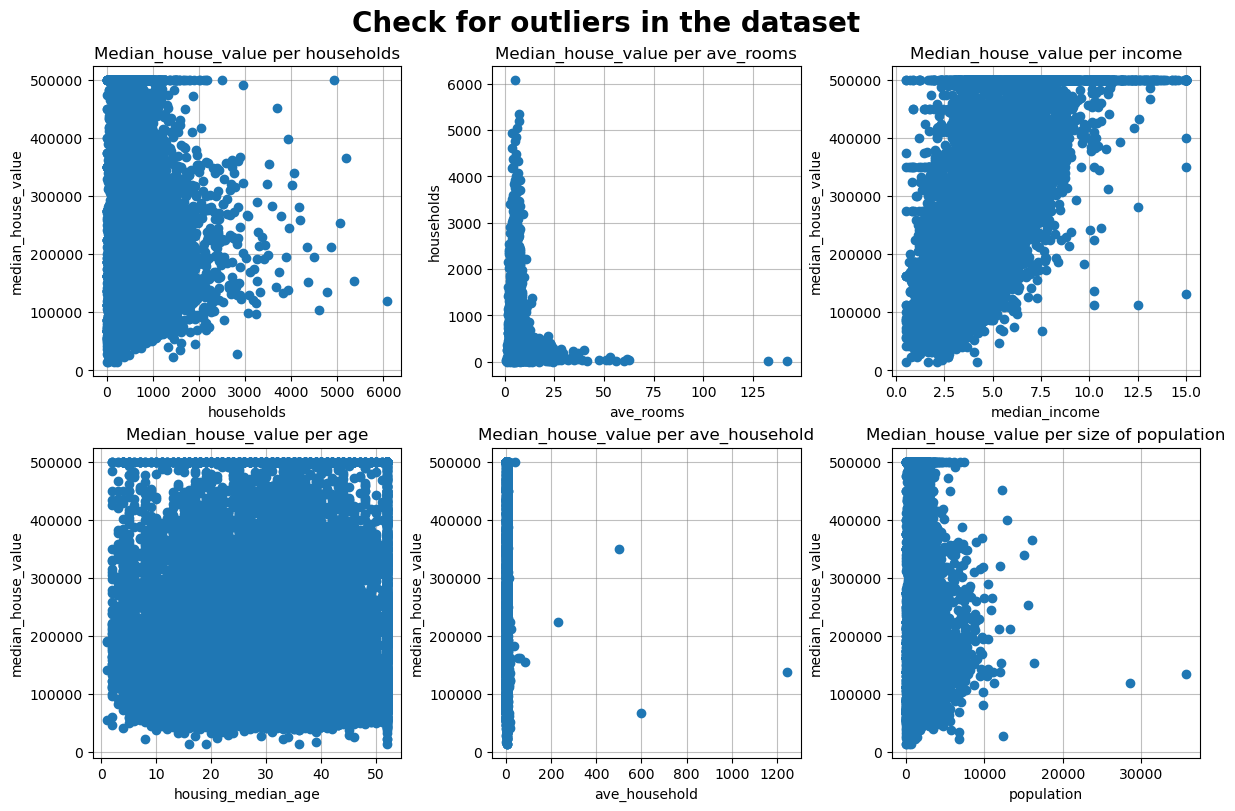

In [23]:
# Check for outliers in the dataset using scatter plots

# create a copy of the data called sampled_data where I can adjust the number of observations I include in the plots. 
sampled_data = housing_cleaned[::1]

# Create the figure and the subplots
fig, axs = plt.subplots(2, 3, figsize = (12,8), layout="constrained")
fig.suptitle("Check for outliers in the dataset", fontsize=20, fontweight='bold', color='black')

# # Group by ocean_proximity and calculate median house values
# housing_ocean = sampled_data.groupby("ocean_proximity")["median_house_value"].mean().sort_values(ascending=False)

# First subplot: Scatter plot for median house value per households
axs[0,0].scatter(sampled_data["households"], sampled_data["median_house_value"])
axs[0,0].set_title("Median_house_value per households")
axs[0,0].set_xlabel("households")
axs[0,0].set_ylabel("median_house_value")
axs[0,0].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[0,0].set_axisbelow(True)

# Second subplot: Scatter plot for median house value per ave_rooms
axs[0,1].scatter(sampled_data["ave_rooms"], sampled_data["households"])
axs[0,1].set_title("Median_house_value per ave_rooms")
axs[0,1].set_xlabel("ave_rooms")
axs[0,1].set_ylabel("households")
axs[0,1].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[0,1].set_axisbelow(True)

# Third subplot: Scatter plot for median house value per income
axs[0,2].scatter(sampled_data["median_income"], sampled_data["median_house_value"])
axs[0,2].set_title("Median_house_value per income")
axs[0,2].set_xlabel("median_income")
axs[0,2].set_ylabel("median_house_value")
axs[0,2].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[0,2].set_axisbelow(True)

# Fourth subplot: Scatter plot for median house value per age
axs[1,0].scatter(sampled_data["housing_median_age"], sampled_data["median_house_value"])
axs[1,0].set_title("Median_house_value per age")
axs[1,0].set_xlabel("housing_median_age")
axs[1,0].set_ylabel("median_house_value")
axs[1,0].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[1,0].set_axisbelow(True)

# Fifth subplot: Scatter plot for mmedian house value per ave size of household
axs[1,1].scatter(sampled_data["ave_household"], sampled_data["median_house_value"])
axs[1,1].set_title("Median_house_value per ave_household")
axs[1,1].set_xlabel("ave_household")
axs[1,1].set_ylabel("median_house_value")
axs[1,1].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[1,1].set_axisbelow(True)

# Sixth subplot: Scatter plot for median house value per size of population
axs[1,2].scatter(sampled_data["population"], sampled_data["median_house_value"])
axs[1,2].set_title("Median_house_value per size of population")
axs[1,2].set_xlabel("population")
axs[1,2].set_ylabel("median_house_value")
axs[1,2].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[1,2].set_axisbelow(True)

plt.show()

Comments: 

Outliers were identified in three variables, population, ave_rooms and ave_households.

    Population: The outliers could be explained by some areas being more densly populated, however when dividing the population by the number of households some households have over 100 people living in the same household which is not realistic. This indicates that either the population or household data contain incorrect data. 
    
    Ave_rooms: Some households have over 20 rooms which seems too big to be realistic. There could probably be a few of those bigger houses but the data have two many observations of households with over 20 room, a few over 100 rooms. 
    
    Other observations: median_house_value, median_income and median_age seem to group everything above a certain max level in one default bucket with the max value. Median_house_value has a max value of 500 000, housing_median_age 52 and median_income 15. This results in a lot of data having the max values which needs to be considered when making statistical analytics on the dataset. Depending on the purpose these max values could also be removed, for example if you would only want to create a model that focus on a certain subset of the data where all these values are below the max values. However, I decided to keep these values in the dataset for now.

Original data shape: (20433, 13)
Data shape after outlier removal: (19985, 13)
Number of rows removed: 448


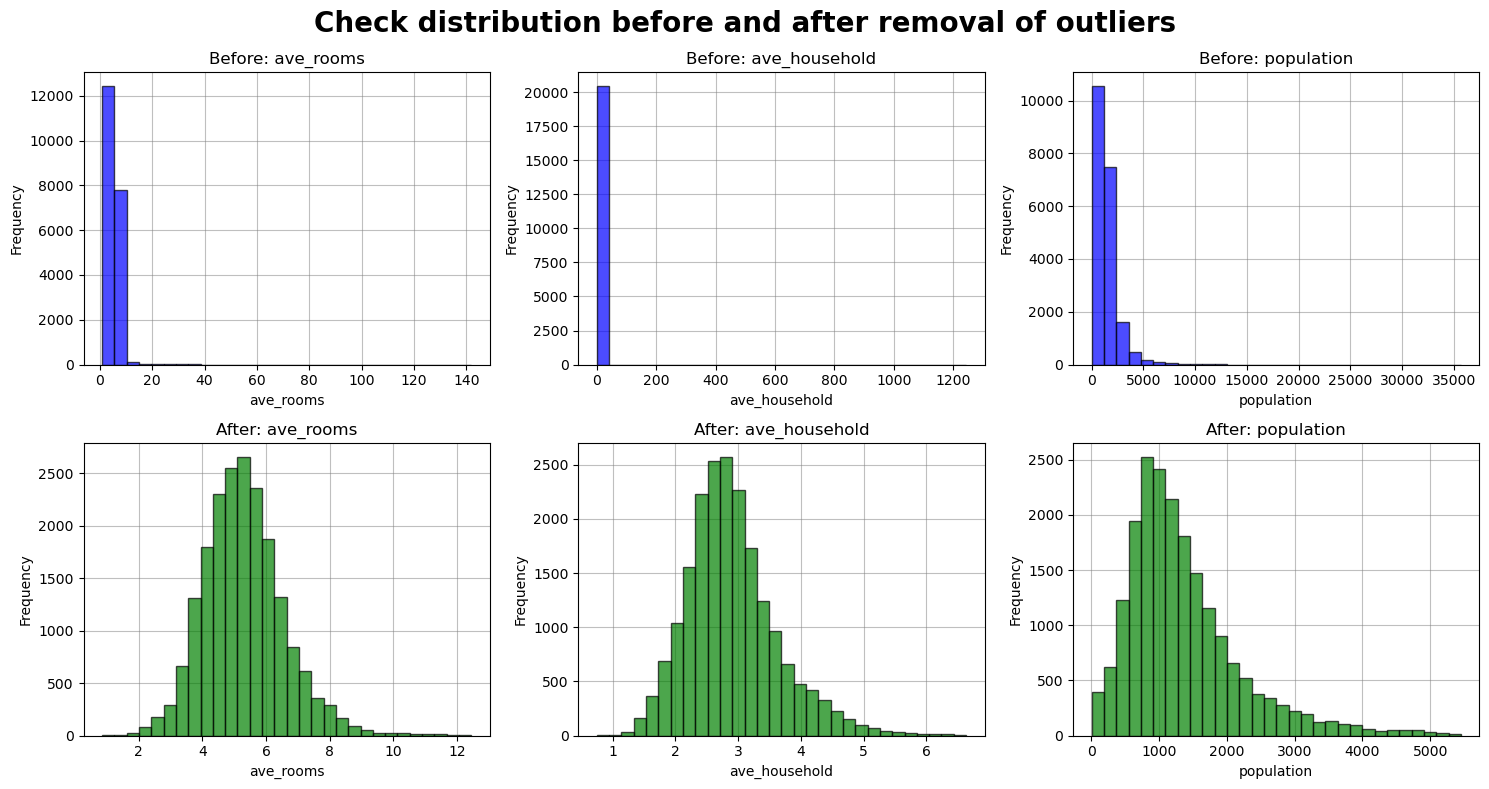

In [25]:
# Remove outliers and check distribution before and after using histogram

# Create a copy of the original dataset to preserve the original data
data_no_outliers = housing_cleaned.copy() 

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 4 * IQR
    upper_bound = Q3 + 4 * IQR
    
    # Filter the data to remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Return the cleaned DataFrame
    return df_no_outliers

# List of columns to check for outliers
columns_to_check = ['ave_rooms', 'ave_household', 'population']

# Print the shape of the original data before removing outliers
print(f"Original data shape: {housing_cleaned.shape}")

# Loop through the columns and remove outliers
for column in columns_to_check:
    data_no_outliers = remove_outliers(data_no_outliers, column)

# Print the shape of the data after removing outliers
print(f"Data shape after outlier removal: {data_no_outliers.shape}")

# Calculate the number of removed rows
removed_rows = housing_cleaned.shape[0] - data_no_outliers.shape[0]
print(f"Number of rows removed: {removed_rows}")

# Plot histograms for comparison (before and after outlier removal)
fig, axs = plt.subplots(2, len(columns_to_check), figsize=(15, 8))
fig.suptitle("Check distribution before and after removal of outliers", fontsize=20, fontweight='bold', color='black')

# Before outlier removal
for i, column in enumerate(columns_to_check):
    axs[0, i].hist(housing_cleaned[column], bins=30, color='blue', edgecolor='black', alpha=0.7)
    axs[0, i].set_title(f"Before: {column}")
    axs[0, i].set_xlabel(column)
    axs[0, i].set_ylabel("Frequency")
    axs[0, i].grid(True, linestyle='-', color='gray', alpha=0.5)
    axs[0, i].set_axisbelow(True)

# After outlier removal
for i, column in enumerate(columns_to_check):
    axs[1, i].hist(data_no_outliers[column], bins=30, color='green', edgecolor='black', alpha=0.7)
    axs[1, i].set_title(f"After: {column}")
    axs[1, i].set_xlabel(column)
    axs[1, i].set_ylabel("Frequency")
    axs[1, i].grid(True, linestyle='-', color='gray', alpha=0.5)
    axs[1, i].set_axisbelow(True)

plt.tight_layout()
plt.show()

Comments: 
A seperate copy of the dataset with removed rows created called data_no_outliers. I used the IQR method to remove outliers for population, ave_rooms and ave_households. I iterated the percentile range so that I removed the outliers but didn't loose too much data. I ended up using an IQR of 4 which translates to keeping all data within the 99,99% percentile. In total 448 rows were removed. The distribution of the data for ave_rooms, ave_household and population looks a lot better and more realistic now. 

After the transformation the dataset data_no_outliers has 19985 rows and 13 columns. 

### 2.5) Data validation

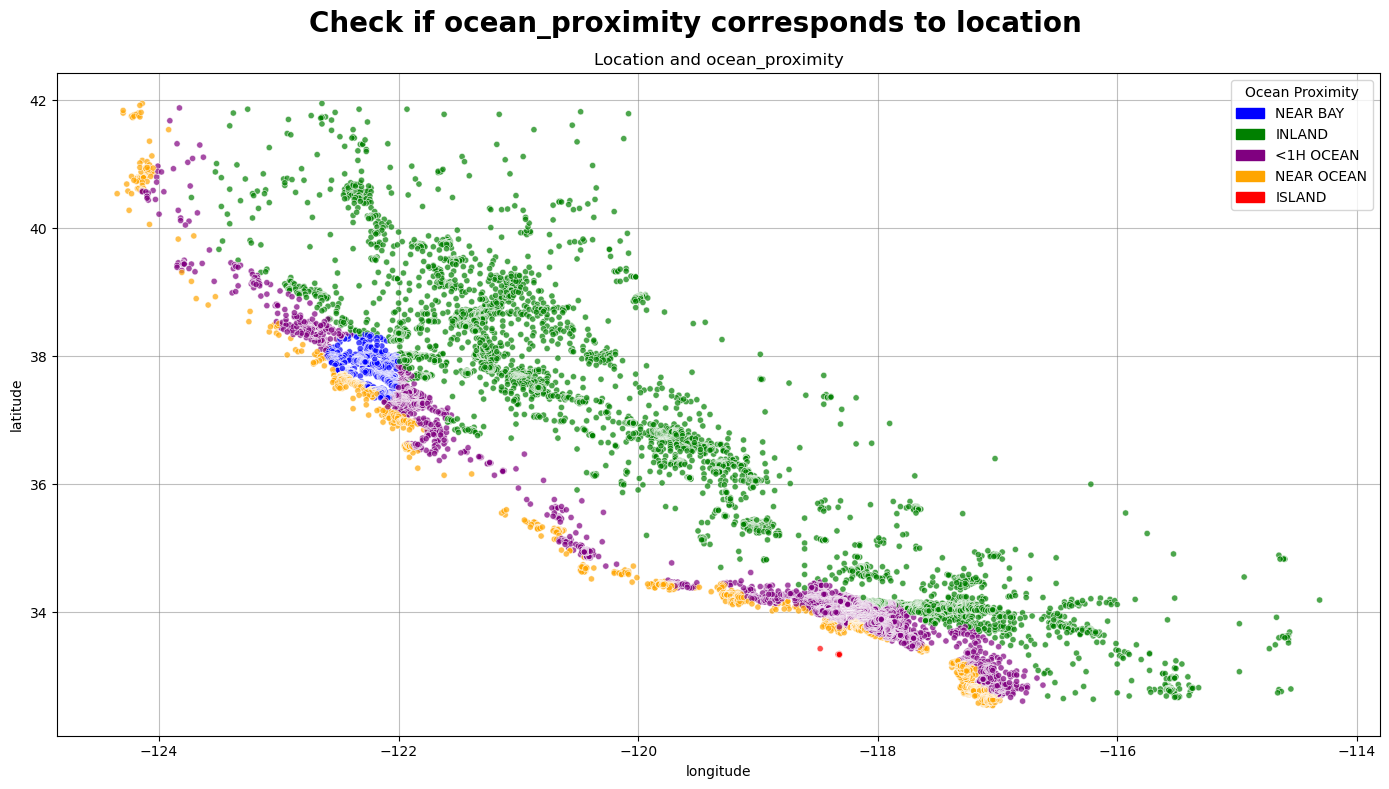

In [35]:
# Check if ocean_proximity corresponds to location using a scatter plot
# Definition of ocean_proximity_colors
ocean_proximity_colors = {
    "NEAR BAY": "blue",
    "INLAND": "green",
    "<1H OCEAN": "purple",
    "NEAR OCEAN": "orange",
    "ISLAND": "red"
}
# Create a copy of data_no_outliers
data_no_outliers_copy = data_no_outliers.copy()

# Map ocean proximity to the color directly
data_no_outliers_copy['ocean_proximity_color'] = data_no_outliers_copy['ocean_proximity'].map(ocean_proximity_colors)

# Create the subplots
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle("Check if ocean_proximity corresponds to location", fontsize=20, fontweight='bold', color='black')

# Scatter plot for ocean proximity by area (latitude and longitude)
scatter = ax.scatter(data_no_outliers_copy["longitude"], data_no_outliers_copy["latitude"], 
                     s=20, c=data_no_outliers_copy["ocean_proximity_color"], 
                     alpha=0.7, edgecolors='w', linewidth=0.5)

# Set the labels and title
ax.set_title("Location and ocean_proximity")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.grid(True, linestyle='-', color='gray', alpha=0.5)
ax.set_axisbelow(True)

# Create a legend for the colors
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in ocean_proximity_colors.items()]
ax.legend(handles=legend_handles, title="Ocean Proximity")

# Show the plot
plt.tight_layout()
plt.show()

Comment: labels for ocean_proximity corresponds well with location

## 3) Data analytics and visualization

The median_house_value vary for different areas on the map and is dependant on a number of variables/columns in the dataset. 
I will explore these dependancies using visualizations in this section, focusing on the below variables;
1) ocean_proximity - hypothesis that the closer to the ocean the more expensive house
2) ave_rooms - hypothesis that the bigger the house the more expensive house
3) median_income - hypothesis that the larger the income the more expensive houses they can afford
4) housing_median_age - hypothesis that the older the more expensive houses they can afford
5) ave_household - hypothesis that larger households cannot afford as expensive houses
6) population - hypothesis that high-population areas have more expensive houses because of higher demand

In [37]:
# Check which area has the highest median_house_value
# Group by ocean_proximity and calculate mean and count of median_house_value
housing_agg_ocean = data_no_outliers.groupby("ocean_proximity", observed=True).agg(mean_median_house_value=("median_house_value", "mean"),
    count=("median_house_value", "count")
).sort_values(by="mean_median_house_value", ascending=False)

# Print the result
print(housing_agg_ocean)

                 mean_median_house_value  count
ocean_proximity                                
ISLAND                     380440.000000      5
NEAR BAY                   259175.585149   2249
NEAR OCEAN                 248856.559381   2585
<1H OCEAN                  240378.068215   8913
INLAND                     123612.212578   6233


Comments: Highest house prices on the island and near the bay, the further you move from the ocean the cheaper the prices. Only 5 rows of data/areas on the Island.

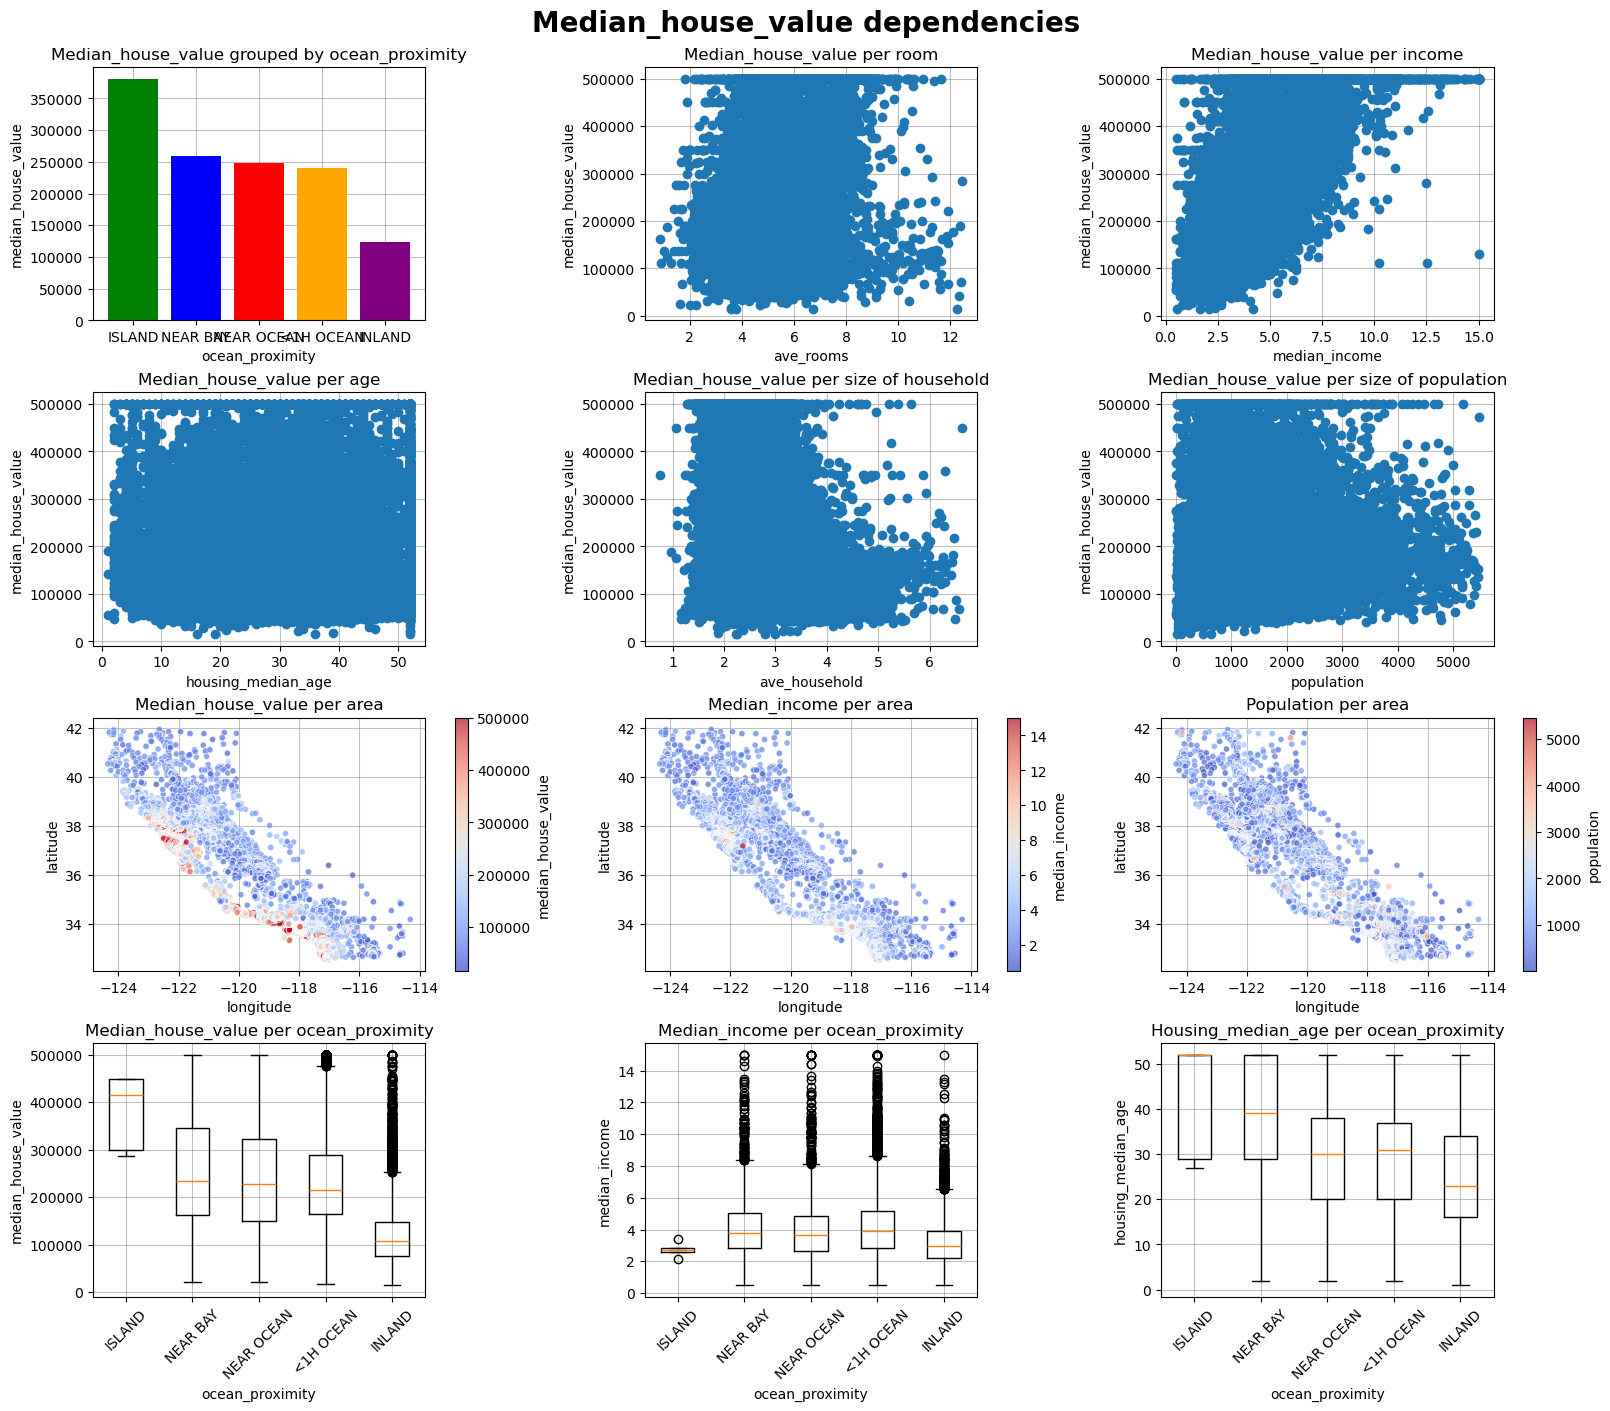

In [39]:
# Explore the median_house_value and its dependancies to other variables and columns in the dataset using various plots

# Create the figure and subplots
fig, axs = plt.subplots(4, 3, figsize=(16, 14), layout="constrained")
fig.suptitle("Median_house_value dependencies", fontsize=20, fontweight='bold', color='black')

# Group by ocean_proximity and calculate median house values using the cleaned data
housing_ocean = data_no_outliers.groupby("ocean_proximity")["median_house_value"].mean().sort_values(ascending=False)

# First subplot: Bar plot for median house value by ocean proximity
axs[0, 0].bar(housing_ocean.index, housing_ocean.values, color=["green", "blue", "red", "orange", "purple"])
axs[0, 0].set_title("Median_house_value grouped by ocean_proximity")
axs[0, 0].set_xlabel("ocean_proximity")
axs[0, 0].set_ylabel("median_house_value")
axs[0, 0].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[0, 0].set_axisbelow(True)

# Second subplot: Scatter plot for median house value per room
axs[0, 1].scatter(data_no_outliers["ave_rooms"], data_no_outliers["median_house_value"])
axs[0, 1].set_title("Median_house_value per room")
axs[0, 1].set_xlabel("ave_rooms")
axs[0, 1].set_ylabel("median_house_value")
axs[0, 1].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[0, 1].set_axisbelow(True)

# Third subplot: Scatter plot for median house value per income
axs[0, 2].scatter(data_no_outliers["median_income"], data_no_outliers["median_house_value"])
axs[0, 2].set_title("Median_house_value per income")
axs[0, 2].set_xlabel("median_income")
axs[0, 2].set_ylabel("median_house_value")
axs[0, 2].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[0, 2].set_axisbelow(True)

# Fourth subplot: Scatter plot for median house value per age
axs[1, 0].scatter(data_no_outliers["housing_median_age"], data_no_outliers["median_house_value"])
axs[1, 0].set_title("Median_house_value per age")
axs[1, 0].set_xlabel("housing_median_age")
axs[1, 0].set_ylabel("median_house_value")
axs[1, 0].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[1, 0].set_axisbelow(True)

# Fifth subplot: Scatter plot for median house value per size of household
axs[1, 1].scatter(data_no_outliers["ave_household"], data_no_outliers["median_house_value"])
axs[1, 1].set_title("Median_house_value per size of household")
axs[1, 1].set_xlabel("ave_household")
axs[1, 1].set_ylabel("median_house_value")
axs[1, 1].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[1, 1].set_axisbelow(True)

# Sixth subplot: Scatter plot for median house value per size of population
axs[1, 2].scatter(data_no_outliers["population"], data_no_outliers["median_house_value"])
axs[1, 2].set_title("Median_house_value per size of population")
axs[1, 2].set_xlabel("population")
axs[1, 2].set_ylabel("median_house_value")
axs[1, 2].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[1, 2].set_axisbelow(True)

# Seventh subplot: Scatter plot for median price per area (latitude and longitude)
scatter = axs[2, 0].scatter(data_no_outliers["longitude"], data_no_outliers["latitude"], s=20, c=data_no_outliers["median_house_value"], cmap='coolwarm', alpha=0.7, edgecolors='w', linewidth=0.5)
axs[2, 0].set_title("Median_house_value per area")
axs[2, 0].set_xlabel("longitude")
axs[2, 0].set_ylabel("latitude")
axs[2, 0].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[2, 0].set_axisbelow(True)
fig.colorbar(scatter, ax=axs[2, 0], label='median_house_value')

# Eighth subplot: Scatter plot for median income per area (latitude and longitude)
scatter = axs[2, 1].scatter(data_no_outliers["longitude"], data_no_outliers["latitude"], s=20, c=data_no_outliers["median_income"], cmap='coolwarm', alpha=0.7, edgecolors='w', linewidth=0.5)
axs[2, 1].set_title("Median_income per area")
axs[2, 1].set_xlabel("longitude")
axs[2, 1].set_ylabel("latitude")
axs[2, 1].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[2, 1].set_axisbelow(True)
fig.colorbar(scatter, ax=axs[2, 1], label='median_income')

# Ninth subplot: Scatter plot for population per area (latitude and longitude)
scatter = axs[2, 2].scatter(data_no_outliers["longitude"], data_no_outliers["latitude"], s=20, c=data_no_outliers["population"], cmap='coolwarm', alpha=0.7, edgecolors='w', linewidth=0.5)
axs[2, 2].set_title("Population per area")
axs[2, 2].set_xlabel("longitude")
axs[2, 2].set_ylabel("latitude")
axs[2, 2].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[2, 2].set_axisbelow(True)
fig.colorbar(scatter, ax=axs[2, 2], label='population')

# Tenth subplot: Boxplot for median house value by ocean proximity
axs[3, 0].boxplot([data_no_outliers[data_no_outliers["ocean_proximity"] == ocean]["median_house_value"] for ocean in housing_ocean.index])
axs[3, 0].set_title("Median_house_value per ocean_proximity")
axs[3, 0].set_xlabel("ocean_proximity")
axs[3, 0].set_ylabel("median_house_value")
axs[3, 0].set_xticklabels(housing_ocean.index, rotation=45)
axs[3, 0].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[3, 0].set_axisbelow(True)

# Eleventh subplot: Boxplot for median income by ocean proximity
axs[3, 1].boxplot([data_no_outliers[data_no_outliers["ocean_proximity"] == ocean]["median_income"] for ocean in housing_ocean.index])
axs[3, 1].set_title("Median_income per ocean_proximity")
axs[3, 1].set_xlabel("ocean_proximity")
axs[3, 1].set_ylabel("median_income")
axs[3, 1].set_xticklabels(housing_ocean.index, rotation=45)
axs[3, 1].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[3, 1].set_axisbelow(True)

# Twelfth subplot: Boxplot for median age by ocean proximity
axs[3, 2].boxplot([data_no_outliers[data_no_outliers["ocean_proximity"] == ocean]["housing_median_age"] for ocean in housing_ocean.index])
axs[3, 2].set_title("Housing_median_age per ocean_proximity")
axs[3, 2].set_xlabel("ocean_proximity")
axs[3, 2].set_ylabel("housing_median_age")
axs[3, 2].set_xticklabels(housing_ocean.index, rotation=45)
axs[3, 2].grid(True, linestyle='-', color='gray', alpha=0.5)
axs[3, 2].set_axisbelow(True)

plt.show()


Comments: 
More expensive houses closer to the ocean.
Older population with lower income own these houses.
Higher house values for areas with higher income.

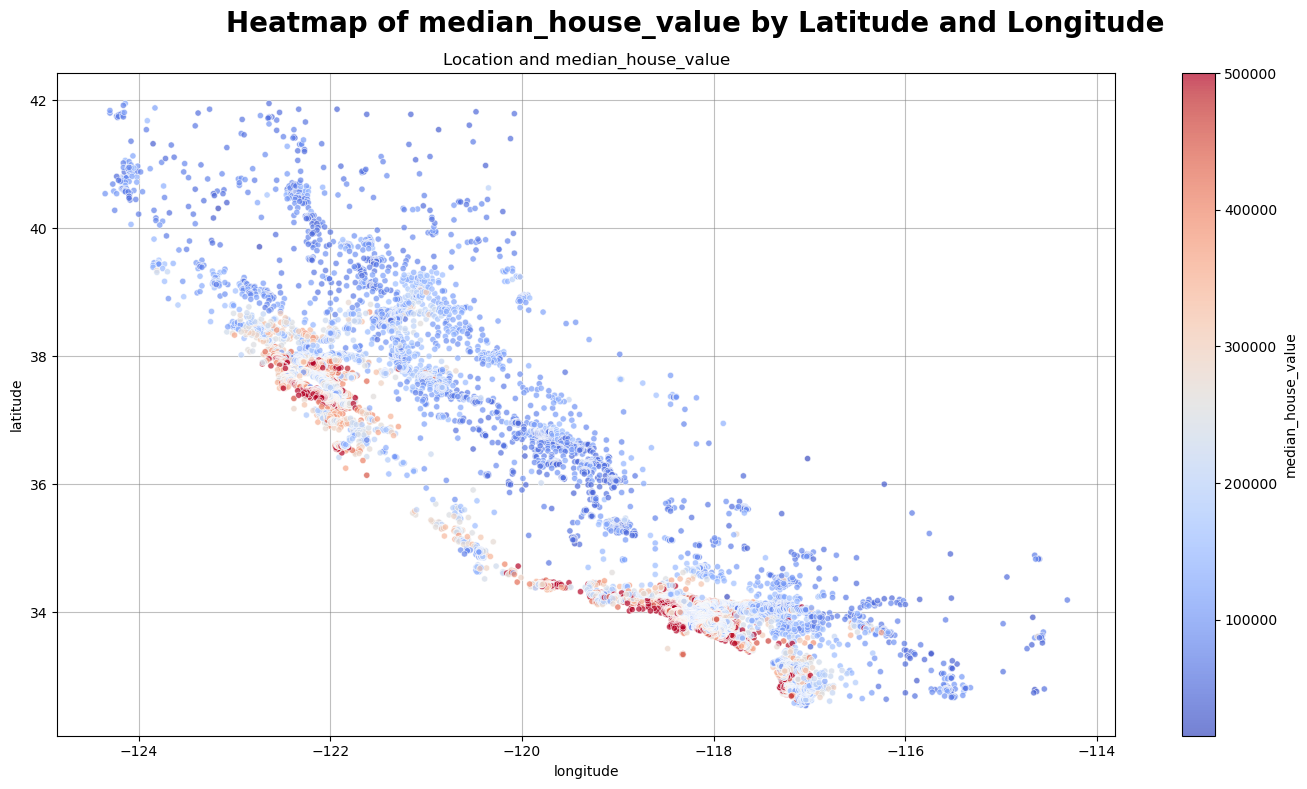

In [41]:
# Check if median_house_value is higher for houses closer to the ocean using a heatmap

# Create the figure and subplot
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle("Heatmap of median_house_value by Latitude and Longitude", fontsize=20, fontweight='bold', color='black')

# Scatter plot for median price per area (latitude and longitude)
scatter = plt.scatter(data_no_outliers["longitude"], data_no_outliers["latitude"], s=20, c=data_no_outliers["median_house_value"], 
                      cmap='coolwarm', alpha=0.7, edgecolors='w', linewidth=0.5)
# s= dotsize, cmap=colormap, alpha=transparency of the scatter points, 
# edgecolors=color of edges of scatter points, linewidth=thickness of edgelines around scatter points

# Set the labels and title
ax.set_title("Location and median_house_value")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.grid(True, linestyle='-', color='gray', alpha=0.5)
ax.set_axisbelow(True)
fig.colorbar(scatter, label='median_house_value')

# Show the plot
plt.tight_layout()
plt.show()


Comment: heatmap confirm that houses closer to the ocean have a higher median price

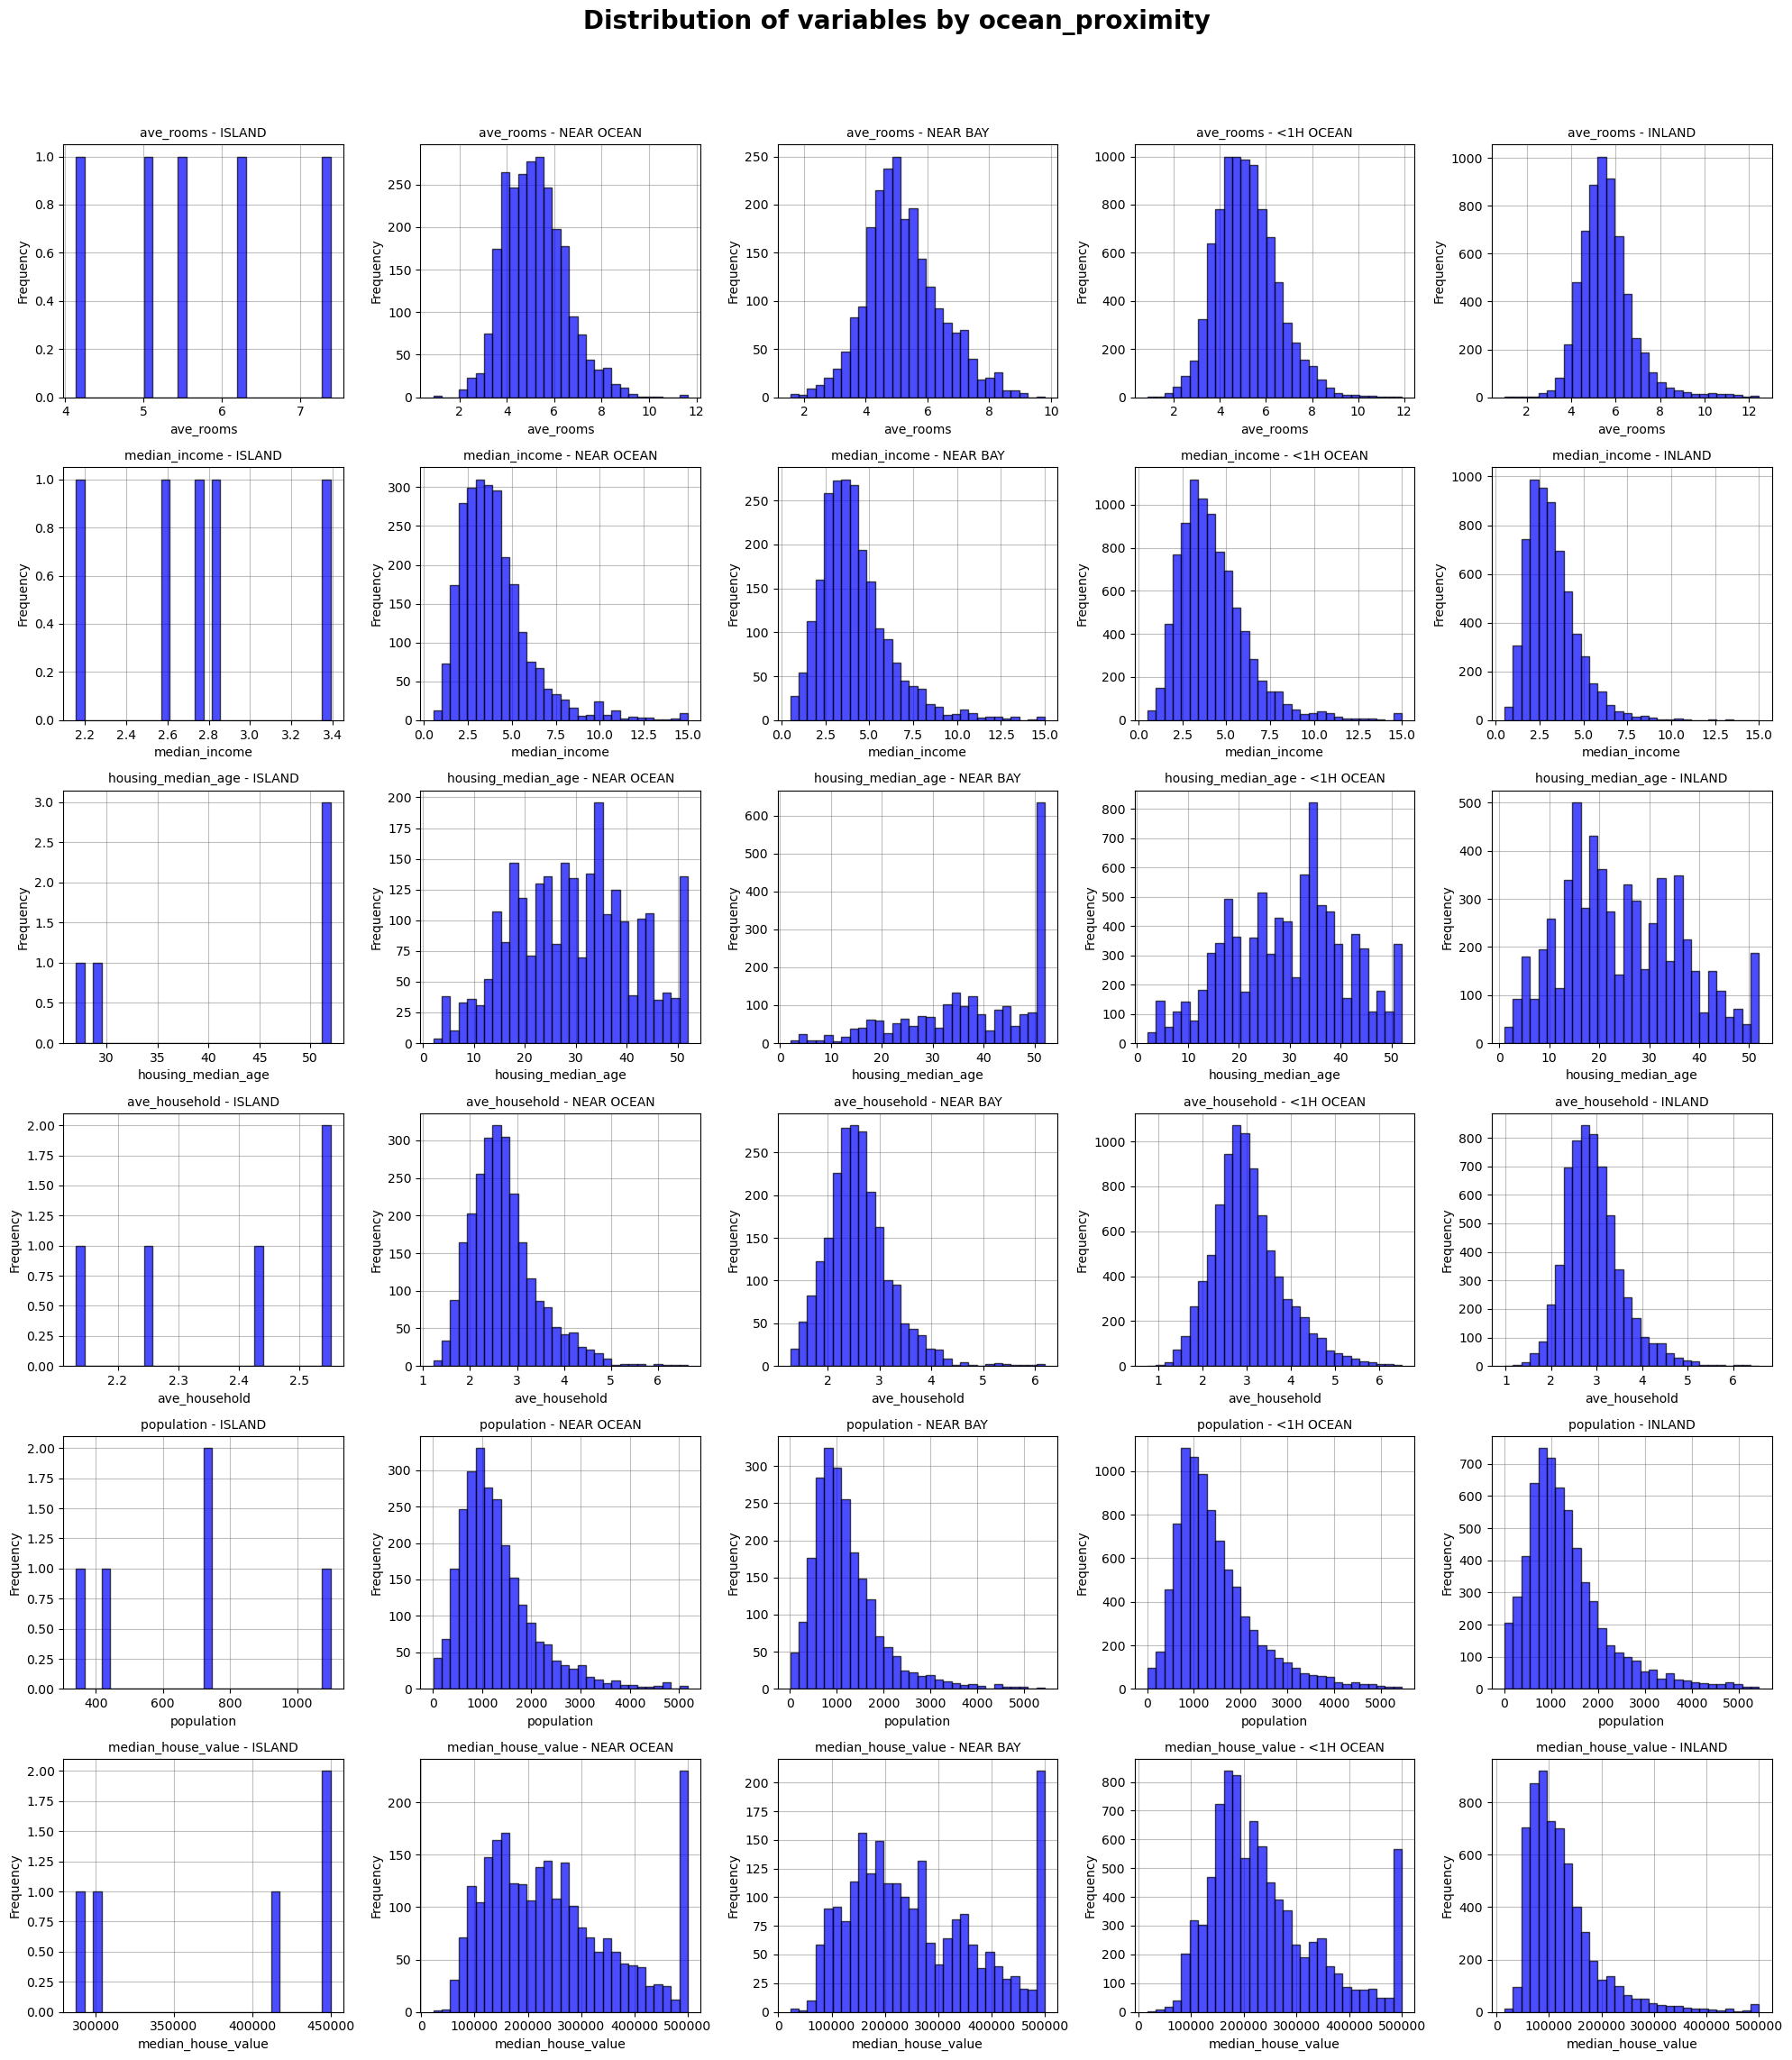

In [43]:
# Check distribution for relevant variables/columns by ocean_proximity using histograms

# Define the custom order for 'ocean_proximity'
ocean_proximity_order = ["ISLAND", "NEAR OCEAN", "NEAR BAY", "<1H OCEAN", "INLAND"]

# Convert 'ocean_proximity' to a categorical type with a specific order
data_no_outliers['ocean_proximity'] = pd.Categorical(data_no_outliers['ocean_proximity'], categories=ocean_proximity_order, ordered=True)

# Define the features to plot, including 'median_house_value'
features = ['ave_rooms', 'median_income', 'housing_median_age', 'ave_household', 'population', 'median_house_value']

# Create the figure and subplots (6 rows, 5 columns for each category and feature)
fig, axs = plt.subplots(6, 5, figsize=(20, 24), sharex=False, sharey=False)
fig.suptitle("Distribution of variables by ocean_proximity", fontsize=20, fontweight='bold', color='black')

# Loop through each feature and ocean_proximity category
for i, feature in enumerate(features):
    for j, category in enumerate(ocean_proximity_order):
        # Filter data for the current ocean_proximity category
        subset = data_no_outliers[data_no_outliers['ocean_proximity'] == category]
        
        # Plot the histogram for the current feature and ocean_proximity category
        ax = axs[i, j]
        ax.hist(subset[feature], bins=30, color="blue", edgecolor='black', alpha=0.7)
        
        # Set the title and labels for each subplot
        ax.set_title(f"{feature} - {category}", fontsize=10)
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")
        ax.grid(True, linestyle='-', color='gray', alpha=0.5)
        ax.set_axisbelow(True)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make room for the suptitle
plt.show()

Comments: 

- housing_median_age: not evenly distributed, a large number of observations in the max level bucket (52) for island, near bay and also near ocean to some degree.
- median_house_value: not evenly distributed, a large number of observations in the max level bucket (500 000) for island, near bay, near ocean and 1H Ocean

## 4) Statistical analytics

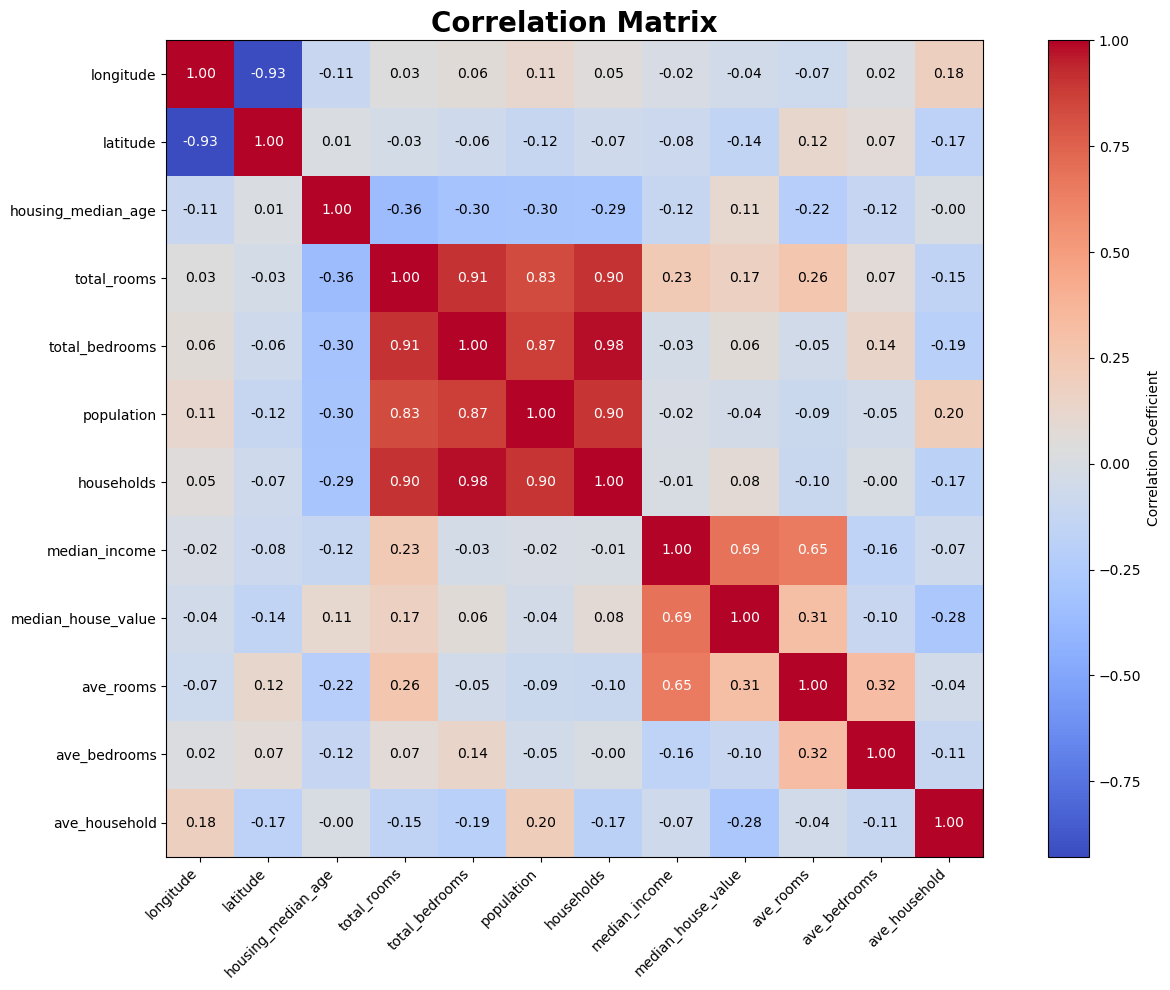

In [45]:
# Statistical analytics using a correlation matrix

# Select only numeric columns
numeric_data = data_no_outliers.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the figure and correlation matrix
plt.figure(figsize=(14, 10))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation Coefficient")
plt.title("Correlation Matrix", fontsize=20, fontweight="bold")

# Add labels for rows and columns
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add correlation coefficient values inside the heatmap boxes
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha="center", va="center", color="black" if abs(value) < 0.5 else "white")

# Title and layout adjustments
plt.tight_layout()
plt.show()

Comments:
- The median_house_value have a strong positive correlation to median_income and indicates that this could be a good variable to predict house prices.
- The median_house_value have a negative correlation to latitude mean which suggest lower house prices in northern (?) regions. 


## 5) Summary and conclusions

### 1) Data import

Dataset contain 20640 rows and 10 columns of data focused on housing data (median_house_value, ocean_proximity, longitude, latitude, total_rooms, total_bedrooms) and population data (households, median_income, population, housing_median_age). Each row representing an area on the map (latitude and longitude).

Columns: 
- longitude: geographical longitude
- latitude: geographical latitude
- housing_median_age: age of housing in the region
- total_rooms: total number of rooms in the region
- total_bedrooms: total number of bedrooms
- popuation: total population in the region
- households: total households in the region
- median_income: median income of residents
- median_house_value: median house value
- ocean_proximity: categorical variable indicating proximity to the ocean

Extreme values (both std and max) for total_rooms, total_bedrooms, population and households which could indicate outliers.

Median_income, median_house_value and housing_median_age also have a large max value which could indicate a cap.

### 2) Data transformation

2.1) Added data - from 10 to 13 columns
The columns total_rooms, total_bedrooms and household reflect the respective sum of all the rooms, all the bedrooms and all the households which can be hard to analyze. To create a more intuitive variable I decided to add columns with the average number of rooms, bedrooms and household.

Ave_rooms = total_rooms / households
Ave_bedrooms = total_bedrooms / households
Ave_household = population / households

2.2) Duplicates
Dataset have no duplicates - no need to make changes to dataset

2.3) Missing data
Dataset have 207 rows with missing data - a seperate copy of the dataset has been created where they have been removed (housing_cleaned)

2.4) Outliers
Outliers were identified in three variables, population, ave_rooms and ave_households.

    Population: The outliers could be explained by some areas being more densly populated, however when dividing the population by the number of households some households have over 100 people living in the same household which is not realistic. This indicates that either the population or household data contain incorrect data. 
    
    Ave_rooms: Some households have over 20 rooms which seems too big to be realistic. There could probably be a few of those bigger houses but the data have two many observations of households with over 20 room, a few over 100 rooms. 
    
    Other observations: median_house_value, median_income and median_age seem to group everything above a certain max level in one default bucket with the max value. Median_house_value has a max value of 500 000, housing_median_age 52 and median_income 15. This results in a lot of data having the max values which needs to be considered when making statistical analytics on the dataset. Depending on the purpose these max values could also be removed, for example if you would only want to create a model that focus on a certain subset of the data where all these values are below the max values. However, I decided to keep these values in the dataset for now. 

    Solution: A seperate copy of the dataset with removed rows as created called data_no_outliers. I used the IQR method to remove outliers for population, ave_rooms and ave_households. I iterated the percentile range so that I removed the outliers but didn't loose too much data. I ended up using an IQR of 4 which translates to keeping all data within the 99,99% percentile. In total 448 rows were removed. 

2.5) Data validation
Check if ocean_proximity corresponds to location, which it did. 

After the transformation the dataset data_no_outliers has 19985 rows and 13 columns. 


### 3) Data analytics and visualization

The median_house_value is dependant on a number variables in the dataset. 

1) ocean_proximity - More expensive houses closer to the ocean with the most expensive house prices on the island and near the bay. Heatmap, bar plot and table confirm this. The island only have 5 areas and datarows which makes it a very small dataset.
2) ave_rooms - slight positiv relationship but not that strong, more rooms should lead to higher median_house_value but not always.
3) median_income - Higher median_house_values for areas with higher median_income. Only exception is the Island where the income is lower but higher median_house_values.
4) housing_median_age - Older population with lower income own the more expensive houses on the island. Near bay also have an older population where the median_house_value is higher.
5) ave_household - no clear relationship between age and median_house_value
6) population - no clear relationship between population and median_house_value 

### 4) Statistical analytics

- The median_house_value have a strong positive correlation to median_income and indicates that this could be a good variable to predict house prices.
- The median_house_value have a negative correlation to latitude mean which suggest lower house prices in northern (?) regions. 

### 5) Summary and conclusions

- More expensive houses closer to the ocean with the most expensive house prices on the island and near the bay. 
- Strong positive correlation between median_house_value and median_income. Higher median_house_values for areas with higher median_income. Only exception is the Island where the income is lower but higher median_house_values. 
- Older population with lower income own the more expensive houses on the island.
  
Ocean_proximity (and longitude/latitude) and median_income are good candidates to predict the median_house_value. 
Housing_median_age could potentially be used to predict the median_house_value for some areas. Ave_rooms can also be used to predict median_house_value but not as strong. If used, these variables should be investigated further statstically.

Median_house_value, median_income and median_age seem to group everything above a certain max level in one default bucket with the max value.This results in a lot of data having the max values which needs to be considered when making statistical analytics and predictions on the dataset.

Läs kursplanen för betygskriterier. 
-----------------------------
I slutet av koden ska du genomföra en självutvärdering där du besvarar följande tre frågor: 
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 
2. Vilket betyg anser du att du ska ha och varför?
    
    Betygsunderlag från samtliga kunskapskontroller krävs för att betyg ska kunna sättas.
    
    Icke godkänt (IG): 
    För att få betyget Icke godkänt (IG) ska den studerande ha genomfört kursen utan att nå alla kursens lärandemål.
    
    Godkänt (G): 
    För att få betyget Godkänt (G) ska den studerande ha genomfört kursen och nått alla kursens lärandemål.
    
    För betyget VG: 
    För att få betyget Väl Godkänt (VG) ska den studerande ha genomfört kursen och nått alla kursens lärandemål. Dessutom ska den studerande med större skicklighet kunna ta eget ansvar för arbetsflödet för ett Python-projekt. Den studerande ska ha förmågan att föreslå förbättringar för att effektivisera kodskrivning, datahantering, felsökning och modellering i arbetsflödet. 


3. Något du vill lyfta fram till Antonio? 

1. Yes, one challenge is to find a good systematic method for the EDA and also decide how deep and detailed the EDA should be.
Another challenge has been the Python programming for the more complex visualizations. To deal with these challenges I have done
more research to gain knowledge, mainly using the links provided, Google and ChatGPT. 
3. G - I have learned a lot on this course and believe I am in line with the learning objectives of the course.
    However, I still have a lot more to learn when it comes to the Python programming to argue that I have the ability to independantly suggest
   improvements on the coding, data handling, error searching or modelling. Even though I might know what I want to produce I still have to do quite
   a bit of research to find the solution, especially for the more complex areas and when I get stuck.
5. The graphs for Matloblib still takes a few seconds to generate (with a copy of the dataset), especially the one with 30 graphs. Is this considered normal or can I write the code more efficiently to improve performance?